In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle
from scipy.stats import sem
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
all_res

['out/20230201_191443/summary.pkl']

In [6]:
loaded

{'train_size': 10,
 'target': ('logKH_CH4', 'CH4 Henry coefficient'),
 'baseline': {'xgb_predictions': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.

In [10]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    num_points = loaded["train_size"]

    metrics = {
        "num_train_points": loaded["train_size"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["train_size"],
        "mae": loaded["baseline"]['xgb_metrics']["mean_absolute_error"],
        "max_error": loaded["baseline"]['xgb_metrics']["max_error"],
        "mse": loaded["baseline"]['xgb_metrics']["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [11]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [12]:
compiled_res

,num_train_points,mae,max_error,mse
0,10,NaN,NaN,NaN


In [13]:
compiled_grouped_res = compiled_res.groupby("num_train_points").agg(["mean", "std", sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [14]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std", sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _va

In [16]:
compiled_gpr_grouped

mae         max_error                mse        
                      mean std sem      mean std sem       mean std sem
num_train_points                                                       
10                5.387672 NaN NaN  6.965315 NaN NaN  29.239454 NaN NaN

NameError: name 'compiled_grouped_res' is not defined

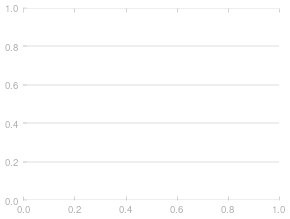

In [31]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)
    ax.plot(
        compiled_grouped_res.loc["SELFIES", :].index,
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"],
        label="GPT SELFIES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["SELFIES", :].index,
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
        - compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
        compiled_grouped_res.loc["SELFIES", :]["mae"]["mean"]
        + compiled_grouped_res.loc["SELFIES", :]["mae"]["std"],
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
        label="GPT SMILES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped["mae"]["mean"],
        label="GPR baseline",
        marker="o",
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
        compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE / eV")
    # ax.set_xscale('log')

fig.savefig("opv_regression_res.pdf", bbox_inches="tight")